<a href="https://colab.research.google.com/github/musicjae/DeepLearning/blob/main/korean_flag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from keras.optimizers import Adam
from keras.applications import ResNet50

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [25]:
img = image.load_img('/content/drive/MyDrive/datasets/flag/train/korean flag/000001 (2).jpg')

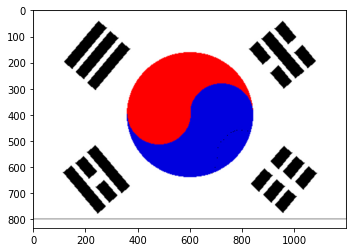

In [26]:
plt.imshow(img)

In [27]:
cv2.imread('/content/drive/MyDrive/datasets/flag/train/korean flag/000001 (2).jpg').shape

(833, 1200, 3)

In [28]:
train = ImageDataGenerator(rescale = 1/255)
val =ImageDataGenerator(rescale=1/255)

In [29]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/datasets/flag/train/',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          shuffle=True,
                                          class_mode='binary')

val_dataset = train.flow_from_directory('/content/drive/MyDrive/datasets/flag/val/',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          shuffle=True,
                                          class_mode='binary')

Found 1013 images belonging to 2 classes.
Found 154 images belonging to 2 classes.


In [30]:
train_dataset.class_indices

{'korean flag': 0, 'no korean flag': 1}

## model1 CNN

In [31]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512, activation='relu'),

                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    
])

## model2 resnet50

In [39]:
res50 = ResNet50(include_top=True, weights='imagenet')

for layer in res50.layers:
    layer.trainable=False

102973440/102967424 [==============================] - 5s 0us/step


In [43]:
x = res50.output # param num= 2048
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

prediction = tf.keras.layers.Dense(2, activation='sigmoid')(x)

model2 = tf.keras.Model(res50.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [44]:
model.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= Adam(lr=0.001), metrics=['accuracy'])

In [45]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs= 10,
                      validation_data = val_dataset)

Epoch 1/10
16/20 [=======================>......] - ETA: 55s - loss: 0.8665 - accuracy: 0.5709 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 379s 19s/step - loss: 0.8080 - accuracy: 0.5962 - val_loss: 0.5397 - val_accuracy: 0.7468
Epoch 2/10
20/20 [==============================] - 105s 5s/step - loss: 0.4901 - accuracy: 0.7583 - val_loss: 0.5176 - val_accuracy: 0.7987
Epoch 3/10
20/20 [==============================] - 45s 2s/step - loss: 0.4003 - accuracy: 0.8094 - val_loss: 0.5737 - val_accuracy: 0.6948
Epoch 4/10
20/20 [==============================] - 27s 1s/step - loss: 0.3158 - accuracy: 0.8422 - val_loss: 0.4652 - val_accuracy: 0.8117
Epoch 5/10
20/20 [==============================] - 15s 758ms/step - loss: 0.2881 - accuracy: 0.8744 - val_loss: 0.5045 - val_accuracy: 0.8052
Epoch 6/10
20/20 [==============================] - 12s 618ms/step - loss: 0.2260 - accuracy: 0.9126 - val_loss: 0.5132 - val_accuracy: 0.8052
Epoch 7/10
20/20 [==============================] - 11s 561ms/step - loss: 0.1584 - accuracy: 0.9364 - val_loss: 0.6226 - val_accuracy: 0.7143
Epoch 8/10
20/20 [=

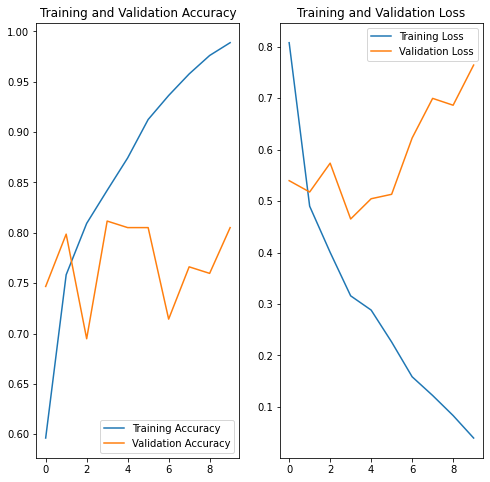

In [46]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

344064/340181 [==============================] - 1s 3us/step
[[0.99911696]]
태극기입니다


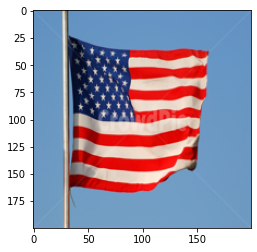

In [47]:
file_path = tf.keras.utils.get_file('test4','https://cdn.crowdpic.net/detail-thumb/thumb_d_5593AB5930CFBEBC8DF6270F73124901.jpg') # 2번째 항에 웹에서 이미지 주소 붙이기
image = Image.open(file_path).convert('RGB')
image = image.resize((200,200))
image = np.array(image) 

image = image.reshape((200,200,3))
plt.imshow(image)
x_test = [image]
x_test = np.array(x_test)
x_test = x_test / 255

pred = model.predict(x_test)
print(pred)
if pred < 0.5:
    print('태극기가 아닙니다')

else:
    print('태극기입니다')